<a href="https://colab.research.google.com/github/andrea-pr/ComputerVision/blob/main/CV_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.10


In [ ]:
 !pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Enable GPU 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Load Dataset

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train_original, y_train_original), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
type(y_train_original)

numpy.ndarray

In [ ]:
type(x_train_original)

numpy.ndarray

In [ ]:
x_train_original.shape

(60000, 28, 28)

In [ ]:
print('Training image size:', x_train_original[0].shape)
print('Training size:', len(x_train_original))
print('Number of classes:', len(np.unique(y_train_original)))
print('Test image size:', x_test[0].shape)
print('Test size:', len(x_test))

Training image size: (28, 28)
Training size: 60000
Number of classes: 10
Test image size: (28, 28)
Test size: 10000


In [ ]:
#No class imbalance present in training set
import collections
counter_train=collections.Counter(y_train_original)
print(counter_train)
counter_test=collections.Counter(y_test)
print(counter_test)

Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})


Image: AxesImage(54,36;334.8x217.44) Label: 9


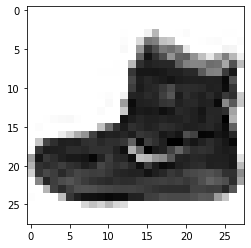

In [ ]:
print("Image:" , plt.imshow(x_train_original[0], cmap = plt.cm.binary), "Label:", y_train_original[0])

Image: AxesImage(54,36;334.8x217.44) Label: 0


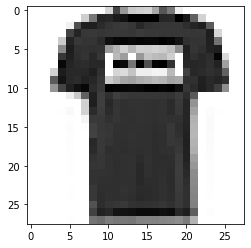

In [ ]:
print("Image:" , plt.imshow(x_train_original[1], cmap = plt.cm.binary), "Label:", y_train_original[1])

In [ ]:
#Get validation set with same class split as training set
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train_original,y_train_original,stratify=y_train_original,test_size=1/6) # before model building

In [ ]:
print('Validation set size', len(y_validation))
counter_val=collections.Counter(y_validation)
print(counter_val) #Same class distribution

Validation set size 10000
Counter({9: 1000, 7: 1000, 3: 1000, 8: 1000, 2: 1000, 0: 1000, 1: 1000, 5: 1000, 6: 1000, 4: 1000})


In [ ]:
x_train, x_test, x_validation, x_train_original =  x_train / 255.0, x_test / 255.0, x_validation/255, x_train_original/255

In [ ]:
#reshape data to fit model
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train_original = x_train_original.reshape(x_train_original.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_validation = x_validation.reshape(x_validation.shape[0],28,28,1)

In [ ]:
x_train.shape

(50000, 28, 28, 1)

Model 1: Base Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras import backend as keras
from keras.callbacks import EarlyStopping

In [ ]:
NUM_EPOCHS = 15
BATCH_SIZE = 32

In [ ]:
#create model
model_1 = Sequential([
  (Conv2D(32, padding = 'same', kernel_size=3, activation="relu", input_shape=(28,28,1))),
  (MaxPooling2D(pool_size=(2, 2))),
  (Conv2D(64, padding = 'same', kernel_size=3, activation="relu")),
  (MaxPooling2D(pool_size=(2, 2))),
  (Conv2D(128, padding = 'same', kernel_size=3, activation="relu")),
  (MaxPooling2D(pool_size=(2, 2))),
  (Flatten()),
  (Dense(128, activation='relu')),
  (Dense(10, activation="softmax"))]
)


In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)             

In [ ]:
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history_model1 = model_1.fit(x=x_train, y=y_train,
	validation_data=(x_validation, y_validation),
	batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6408 - accuracy: 0.7659 - val_loss: 0.3382 - val_accuracy: 0.8726
Epoch 2/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.2904 - accuracy: 0.8910 - val_loss: 0.2704 - val_accuracy: 0.9018
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2348 - accuracy: 0.9124 - val_loss: 0.2562 - val_accuracy: 0.9059
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2073 - accuracy: 0.9220 - val_loss: 0.2669 - val_accuracy: 0.9059
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1750 - accuracy: 0.9352 - val_loss: 0.2470 - val_accuracy: 0.9108
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1559 - accuracy: 0.9419 - val_loss: 0.2363 - val_accuracy: 0.9178
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1355 - accuracy: 0.9510 - val_loss: 0.2456 - val_accuracy:

In [ ]:
def print_loss_graph (model): 
  plt.plot(model.history['loss'], label='train_loss')
  plt.plot(model.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='lower right')
  plt.title('Loss per Epoch')
  return plt.show()

In [ ]:
def print_loss_pair_graph (model1, model2, m1label, m2label): 
  plt.plot(model1.history['loss'], label= m1label+'_loss')
  plt.plot(model1.history['val_loss'], label = m1label+'_val_loss')
  plt.plot(model2.history['loss'], label=m2label+'_loss')
  plt.plot(model2.history['val_loss'], label = m2label+'_val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='lower right')
  plt.title('Loss per Epoch')
  return plt.show()

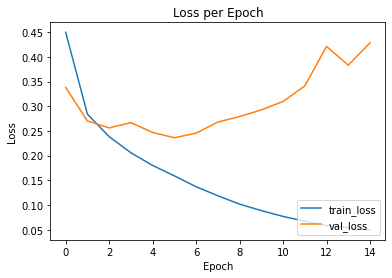

In [ ]:
print_loss_graph(history_model1)

In [ ]:
model_1.save('model1_weights.h', save_format='h5')

Model 2: Add BatchNormalization

In [ ]:
#create model
model_2 = Sequential()
#add model layers
model_2.add(Conv2D(32, padding = 'same', kernel_size=3, activation='relu', input_shape=(28,28,1)))
model_2.add(Conv2D(64, padding = 'same', kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(128, padding = 'same', kernel_size=3, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(10, activation="softmax"))


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 128)        

In [ ]:
model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history_model2 = model_2.fit(x=x_train, y=y_train,
	validation_data=(x_validation, y_validation),
	batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5752 - accuracy: 0.8213 - val_loss: 0.3510 - val_accuracy: 0.8739
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2514 - accuracy: 0.9078 - val_loss: 0.2754 - val_accuracy: 0.9047
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2000 - accuracy: 0.9243 - val_loss: 0.2637 - val_accuracy: 0.9078
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1624 - accuracy: 0.9405 - val_loss: 0.2294 - val_accuracy: 0.9204
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1391 - accuracy: 0.9504 - val_loss: 0.2411 - val_accuracy: 0.9237
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1153 - accuracy: 0.9565 - val_loss: 0.2706 - val_accuracy: 0.9224
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0941 - accuracy: 0.9643 - val_loss: 0.3044 - val_accuracy:

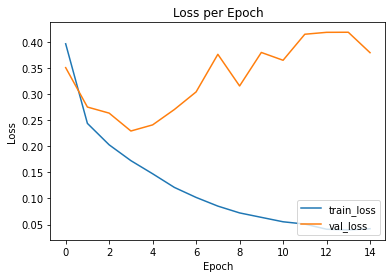

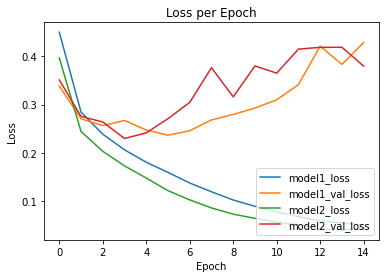

In [ ]:
print_loss_graph(history_model2)
print_loss_pair_graph(history_model1, history_model2, 'model1', 'model2')

In [ ]:
model_2.save('model2_weights.h', save_format='h5')

Model 3: Average Pooling Instead of Max Pooling

In [ ]:
#create model
model_3 = Sequential()
#add model layers
model_3.add(Conv2D(32, padding = 'same', kernel_size=3, activation='relu',input_shape=(28,28,1)))
model_3.add(AveragePooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, padding = 'same', kernel_size=3, activation='relu'))
model_3.add(AveragePooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(128, padding = 'same', kernel_size=3, activation='relu'))
model_3.add(AveragePooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(10, activation="softmax"))

In [ ]:
model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history_model3 = model_3.fit(x=x_train, y=y_train,
	validation_data=(x_validation, y_validation),
	batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7487 - accuracy: 0.7213 - val_loss: 0.4087 - val_accuracy: 0.8453
Epoch 2/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.3644 - accuracy: 0.8658 - val_loss: 0.3731 - val_accuracy: 0.8545
Epoch 3/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.3003 - accuracy: 0.8898 - val_loss: 0.2861 - val_accuracy: 0.8926
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2646 - accuracy: 0.9017 - val_loss: 0.2826 - val_accuracy: 0.8955
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2304 - accuracy: 0.9155 - val_loss: 0.2481 - val_accuracy: 0.9109
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2176 - accuracy: 0.9194 - val_loss: 0.3327 - val_accuracy: 0.8761
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1936 - accuracy: 0.9297 - val_loss: 0.2500 - val_accuracy:

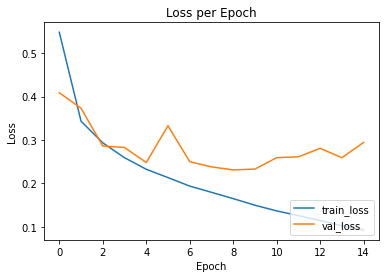

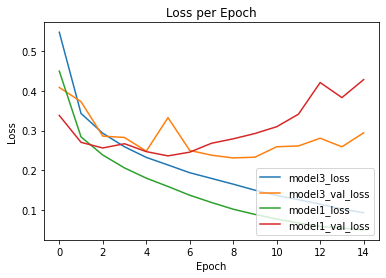

In [ ]:
print_loss_graph(history_model3)
print_loss_pair_graph(history_model3, history_model1, 'model3', 'model1')

In [ ]:
model_3.save('model3_weights.h', save_format='h5')

Model 4: Bigger kernel size than model 2

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, padding = 'same', kernel_size=11, activation='relu', input_shape=(28,28,1)))
model_4.add(Conv2D(64, padding = 'same', kernel_size=11, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128, padding = 'same', kernel_size=11, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(10, activation="softmax"))

In [ ]:
#Optimizer batch stochastic gradient descent
model_4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_model4 = model_4.fit(x=x_train, y=y_train,
	validation_data=(x_validation, y_validation),
	batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7564 - accuracy: 0.7481 - val_loss: 0.3699 - val_accuracy: 0.8613
Epoch 2/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3342 - accuracy: 0.8741 - val_loss: 0.3179 - val_accuracy: 0.8785
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2753 - accuracy: 0.8978 - val_loss: 0.2929 - val_accuracy: 0.8940
Epoch 4/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2411 - accuracy: 0.9105 - val_loss: 0.2764 - val_accuracy: 0.8970
Epoch 5/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2093 - accuracy: 0.9217 - val_loss: 0.2844 - val_accuracy: 0.8980
Epoch 6/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1813 - accuracy: 0.9324 - val_loss: 0.3019 - val_accuracy: 0.8917
Epoch 7/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1611 - accuracy: 0.9397 - val_loss: 0.2579 -

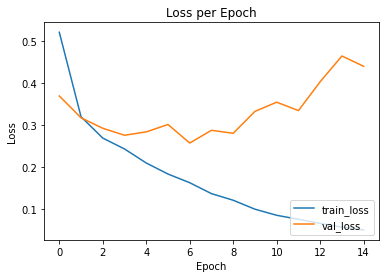

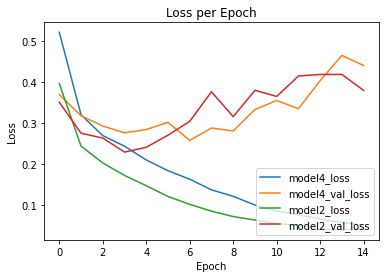

In [ ]:
print_loss_graph(history_model4)
print_loss_pair_graph(history_model4, history_model2, 'model4', 'model2')

In [ ]:
model_4.save('model4_weights.h', save_format='h5')

Model 5: Use different weight initialization -  
Instead of normalized xavier weight initialization (glorot uniform) use kaiming initialization - 
Model 2, but with different weight initialization

In [ ]:
initializer = tf.keras.initializers.HeNormal()

In [ ]:
model_5 = Sequential()
model_5.add(Conv2D(32, padding = 'same', kernel_size=3, activation='relu', input_shape=(28,28,1), kernel_initializer=initializer))
model_5.add(Conv2D(64, padding = 'same', kernel_size=3, activation='relu', kernel_initializer=initializer))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Conv2D(128, padding = 'same', kernel_size=3, activation='relu', kernel_initializer=initializer))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Flatten()
model_5.add(Dense(128, activation='relu', kernel_initializer=initializer))
model_5.add(Dense(10, activation="softmax"))

In [ ]:
model_5.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_model5 = model_5.fit(x=x_train, y=y_train,
	validation_data=(x_validation, y_validation),
	batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5857 - accuracy: 0.8233 - val_loss: 0.3513 - val_accuracy: 0.8761
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2478 - accuracy: 0.9076 - val_loss: 0.2504 - val_accuracy: 0.9098
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1985 - accuracy: 0.9262 - val_loss: 0.2465 - val_accuracy: 0.9133
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1620 - accuracy: 0.9366 - val_loss: 0.2483 - val_accuracy: 0.9167
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1286 - accuracy: 0.9515 - val_loss: 0.2335 - val_accuracy: 0.9234
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1025 - accuracy: 0.9619 - val_loss: 0.2557 - val_accuracy: 0.9192
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0870 - accuracy: 0.9676 - val_loss: 0.2827 - val_accuracy:

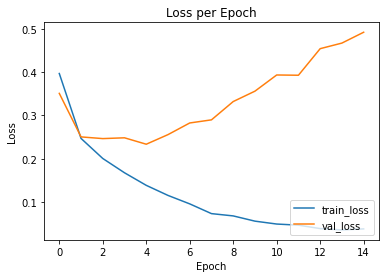

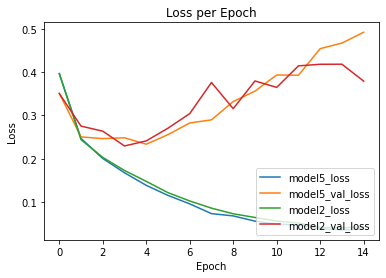

In [ ]:
print_loss_graph(history_model5)
print_loss_pair_graph(history_model5, history_model2, 'model5', 'model2')

In [ ]:
model_5.save('model5_weights.h', save_format='h5')

Running Best and Second Best Model on the Test Set


In [ ]:
#create model
model2_best = Sequential()
#add model layers
model2_best.add(Conv2D(32, padding = 'same', kernel_size=3, activation='relu', input_shape=(28,28,1)))
model2_best.add(Conv2D(64, padding = 'same', kernel_size=3, activation='relu'))
model2_best.add(BatchNormalization())
model2_best.add(MaxPooling2D(pool_size=(2, 2)))
model2_best.add(Conv2D(128, padding = 'same', kernel_size=3, activation='relu'))
model2_best.add(BatchNormalization())
model2_best.add(MaxPooling2D(pool_size=(2, 2)))
model2_best.add(Flatten())
model2_best.add(Dense(128, activation='relu'))
model2_best.add(Dense(10, activation="softmax"))

model2_best.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model2_best_history = model2_best.fit(x=x_train_original, y=y_train_original,	batch_size=BATCH_SIZE, epochs=4, validation_split=0)


Epoch 1/4
1875/1875 [==============================] - 41s 4ms/step - loss: 0.5693 - accuracy: 0.8233
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2280 - accuracy: 0.9160
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1896 - accuracy: 0.9291
Epoch 4/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1661 - accuracy: 0.9389


In [ ]:
score = model2_best.evaluate(x_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
print(model2_best.predict(x_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.9172
Test loss: 0.244821697473526 / Test accuracy: 0.9172000288963318
[[1.0873823e-08 3.9154628e-08 3.2212708e-11 ... 9.7243655e-03
  2.3335955e-09 9.9009573e-01]
 [2.7660017e-05 2.1668694e-14 9.9993503e-01 ... 6.9976404e-20
  1.6632229e-10 1.9991638e-24]
 [4.0973244e-14 1.0000000e+00 4.0012747e-13 ... 1.0397376e-20
  1.5922210e-15 1.5888900e-15]
 ...
 [1.7976637e-13 6.3851639e-15 3.0962976e-15 ... 4.4123356e-14
  1.0000000e+00 4.4823855e-17]
 [4.9103576e-15 1.0000000e+00 2.0519951e-12 ... 5.5372189e-19
  2.2431667e-14 2.6451613e-16]
 [1.7615335e-07 1.7120194e-11 7.9217122e-09 ... 1.8031441e-01
  3.7977870e-06 4.2663178e-05]]


In [ ]:
model2_best.save('model2_best_weights.h', save_format='h5')

In [ ]:
model3_best = Sequential()
model3_best.add(Conv2D(32, padding = 'same', kernel_size=3, activation='relu',input_shape=(28,28,1)))
model3_best.add(AveragePooling2D(pool_size=(2, 2)))
model3_best.add(Conv2D(64, padding = 'same', kernel_size=3, activation='relu'))
model3_best.add(AveragePooling2D(pool_size=(2, 2)))
model3_best.add(Conv2D(128, padding = 'same', kernel_size=3, activation='relu'))
model3_best.add(AveragePooling2D(pool_size=(2, 2)))
model3_best.add(Flatten())
model3_best.add(Dense(128, activation='relu'))
model3_best.add(Dense(10, activation="softmax"))

model3_best.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model3_history = model3_best.fit(x=x_train_original, y=y_train_original,	batch_size=BATCH_SIZE, epochs=9, validation_split=0)
model3_best.save('model3_best_weights.h', save_format='h5')

Epoch 1/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7130 - accuracy: 0.7375
Epoch 2/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3529 - accuracy: 0.8704
Epoch 3/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8916
Epoch 4/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2548 - accuracy: 0.9052
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2280 - accuracy: 0.9151
Epoch 6/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2050 - accuracy: 0.9238
Epoch 7/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1854 - accuracy: 0.9312
Epoch 8/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1670 - accuracy: 0.9378
Epoch 9/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1617 - accuracy: 0.9407


In [ ]:
score = model3_best.evaluate(x_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
print(model3_best.predict(x_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.2401 - accuracy: 0.9162
Test loss: 0.24008744955062866 / Test accuracy: 0.9161999821662903
[[3.0428648e-08 3.3499828e-07 1.2655108e-09 ... 1.9701546e-04
  1.5959217e-09 9.9975890e-01]
 [6.2345974e-03 5.8035954e-10 9.9214101e-01 ... 2.9943416e-11
  1.8314855e-05 7.7633482e-09]
 [1.3117511e-10 1.0000000e+00 1.2981247e-09 ... 3.7289940e-24
  2.3549912e-11 3.5832740e-20]
 ...
 [1.0181583e-12 2.6790558e-18 1.8167156e-12 ... 4.4704345e-16
  1.0000000e+00 8.8258067e-17]
 [5.0291046e-08 9.9999833e-01 8.6094968e-07 ... 4.0070990e-15
  1.6870077e-07 5.3890646e-12]
 [2.3081269e-05 1.1942218e-09 1.8757260e-07 ... 1.2696855e-02
  1.1884534e-03 1.7891649e-05]]


Choice Task: Create and apply a function to decrease the learning rate at a 1/2 of the value every 5 epochs

In [ ]:
from keras.callbacks import LearningRateScheduler
import math
 
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 5
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
#create model
model_1 = Sequential([
  (Conv2D(32, padding = 'same', kernel_size=3, activation="relu", input_shape=(28,28,1))),
  (MaxPooling2D(pool_size=(2, 2))),
  (Conv2D(64, padding = 'same', kernel_size=3, activation="relu")),
  (MaxPooling2D(pool_size=(2, 2))),
  (Conv2D(128, padding = 'same', kernel_size=3, activation="relu")),
  (MaxPooling2D(pool_size=(2, 2))),
  (Flatten()),
  (Dense(128, activation='relu')),
  (Dense(10, activation="softmax"))]
)

In [ ]:
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [ ]:
model_1.fit(x=x_train, y=y_train,
	validation_data=(x_validation, y_validation),
	batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, callbacks=callbacks_list)

Choice Task: Perform data augmentation techniques (at least 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
aug = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.15,
	  width_shift_range=0.2, 
    height_shift_range=0.2, 
	  horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
#create model
model_1 = Sequential([
  (Conv2D(32, padding = 'same', kernel_size=3, activation="relu", input_shape=(28,28,1))),
  (MaxPooling2D(pool_size=(2, 2))),
  (Conv2D(64, padding = 'same', kernel_size=3, activation="relu")),
  (MaxPooling2D(pool_size=(2, 2))),
  (Conv2D(128, padding = 'same', kernel_size=3, activation="relu")),
  (MaxPooling2D(pool_size=(2, 2))),
  (Flatten()),
  (Dense(128, activation='relu')),
  (Dense(10, activation="softmax"))]
)

In [ ]:
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history_model1_augmented = model_1.fit_generator(aug.flow(x_train, y_train, batch_size=BATCH_SIZE),
	validation_data=(x_validation, y_validation), steps_per_epoch=len(x_train) // BATCH_SIZE,
	epochs=NUM_EPOCHS)

In [ ]:
validation_loss, validation_acc = model_1.evaluate(x_validation, y_validation, verbose=0)
print('Validation loss model 1 with data augmentation:', validation_loss)
print('Validation accuracy model 1 with data augmentation:', validation_acc)

Choice Task: Provide and explain a confusion matrix for the results on the test set of one of the models

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model2_best.predict(x_test)

In [ ]:
predictions_test = []

for i in range(0, len(y_test)): 
   predictions_test.append(predictions[i].argmax())

In [ ]:
from mlxtend.evaluate import confusion_matrix


cm = confusion_matrix(y_target=y_test, 
                      y_predicted=predictions_test, 
                      binary=False)
cm

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,10,1))
plt.show()

In [ ]:
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=predictions_test, 
                      binary=True,positive_label=1)
cm

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()